# Instanciate the Candidate Database

In [1]:
import networkx
import polars as pl
# %env NX_CURGAPH_AUTOCONFIG=True
import networkx as nx
import candidate_dataset

DATA_PATH = "./data/"
METADATA_PATH = "./metadata/"

dataset = candidate_dataset.CandidateDataset(
    source_train=DATA_PATH + "train.csv",
    source_test=DATA_PATH + "test.csv",
    source_feature_data=METADATA_PATH + "feature_metadata_refined.json",
)

dataset.build_pipeline(limit=None, fill_missing=False, encode_categorical=False, normalize_cols=False)
dataset.build_candidate_id_set()
dataset.df_train.sort(by="ID").select(sorted(dataset.df_train.columns))

Successfully instanciated Candidate Dataset and imported feature metadata.
Imported train dataset with 272819 entries (272819 of which have missing features)
Imported test dataset with 48416 entries (15162 of which have missing features)


ID,feature_001,feature_002,feature_003,feature_004,feature_005,feature_006,feature_007,feature_008,feature_009,feature_010,feature_011,feature_012,feature_013,feature_014,feature_015,feature_016,feature_017,feature_018,high_conf_clean,is_cheating
u64,str,i16,i16,i16,i16,i16,bool,i16,i16,f32,bool,str,bool,bool,f32,f32,f32,f32,bool,bool
111395511279975,"""2""",2,5,8,1,1,true,10,10,687.0,false,"""0""",true,true,0.23463,5.0,22.203337,0.48195,true,null
149515486601323,"""2""",3,7,1,2,3,true,9,9,65.0,false,"""0""",false,true,0.028935,0.0,null,0.82,true,null
160906985161287,"""5""",7,8,1,8,7,true,9,9,762.0,false,"""0""",true,true,1.065972,2.0,5.725,0.3902,null,false
372923524293330,null,null,null,4,6,7,true,10,9,810.0,false,"""0""",true,true,0.036042,1.0,1.233333,0.65,true,null
396236678209396,"""4""",5,8,8,5,5,true,9,0,235.0,false,"""0""",true,true,0.931875,2.0,15.325,0.75,true,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
18446539283039586544,"""1""",8,7,7,2,7,true,10,9,668.0,false,"""0""",true,true,128.190536,3.0,3.103772,0.6778,true,null
18446564111536718883,"""2""",8,4,9,7,7,true,0,0,0.0,false,"""3""",true,true,0.025266,1.0,11.9,0.22,null,false
18446710016529126028,"""5""",8,3,9,6,0,true,1,0,143.0,false,"""2""",false,false,1.083414,1.0,2.266667,0.4778,null,false


In [2]:
df_train, df_test = dataset.split()

print(type(df_train))
df_train.head()

Split dataframe into 218255 training and 54564 validation entries.
<class 'polars.dataframe.frame.DataFrame'>


ID,feature_001,feature_002,feature_003,feature_004,feature_005,feature_006,feature_007,feature_008,feature_009,feature_010,feature_011,feature_012,feature_013,feature_014,feature_015,feature_016,feature_017,feature_018,high_conf_clean,is_cheating
u64,str,i16,i16,i16,i16,i16,bool,i16,i16,f32,bool,str,bool,bool,f32,f32,f32,f32,bool,bool
9925137249666252685,"""5""",7,1,9,6,0,false,0,0,0.0,false,"""3""",false,false,0.023368,0.0,null,0.145,null,true
17510260092577491870,"""4""",7,4,10,2,7,true,1,0,0.0,false,"""0""",true,true,0.022894,1.0,15.95,0.33,null,false
5956214523393149507,"""2""",2,4,8,2,6,false,0,0,0.0,false,"""0""",false,true,0.02588,1.0,15.35,0.3,true,null
1148513036740754477,"""4""",7,6,1,9,7,true,0,0,0.0,false,"""1""",true,true,0.035694,3.0,11.83354,0.3,null,false
13647347889513101289,"""1""",2,8,1,9,6,false,0,0,0.0,false,"""0""",true,true,0.059769,1.0,8.6,0.72,true,null


In [6]:
params = {
    "objective": "binary:logistic",
    "tree_method": "hist",
    "booster": "gbtree",
    "eval_metric": "auc",
    "n_estimators": 20,
    "max_depth": 8,
    "subsample": 0.5,
    "colsample_bytree": 1.0,
    "colsample_bylevel": 0.6,
    "colsample_bynode": 1.0,
    "verbosity": 2,
    "device": "cpu",
    "enable_categorical": True,
    "n_jobs": 4,
}

xgb = dataset.fit_xgboost_model(dataset.df_train, params=params)

dataset.evaluate_xgboost_model(xgb, dataset.df_test)

KeyError: DataType(large_string)

# Instanciate the Netork

In [2]:
import social_graph

network = social_graph.SocialGraph(source_file=DATA_PATH + "social_graph.csv")
network.build(limit=None)

Successfully built & validated social graph with 1727366 nodes.


In [4]:
adjacency, laplacian = network.get_adj_lapl_mat(community_idx=150)
type(adjacency)
# embeddings = network.get_spectral_embeddings(community_idx=150, n_components=4)

scipy.sparse._csr.csr_array

In [7]:
import numpy as np
np.any(laplacian == np.nan)

np.False_

In [9]:
embeddings = network.get_spectral_embeddings(community_idx=150, n_components=3)

min_coords = embeddings.min(axis=0)
max_coords = embeddings.max(axis=0)
range_coords = max_coords - min_coords

# Normalize to [0, 1]
range_coords[range_coords == 0] = 1.0
embeddings = (embeddings - min_coords) / range_coords


In [11]:
dataset.df_train.filter(pl.col("ID") == 5956214523393149507)["is_cheating"]

is_cheating
bool
null


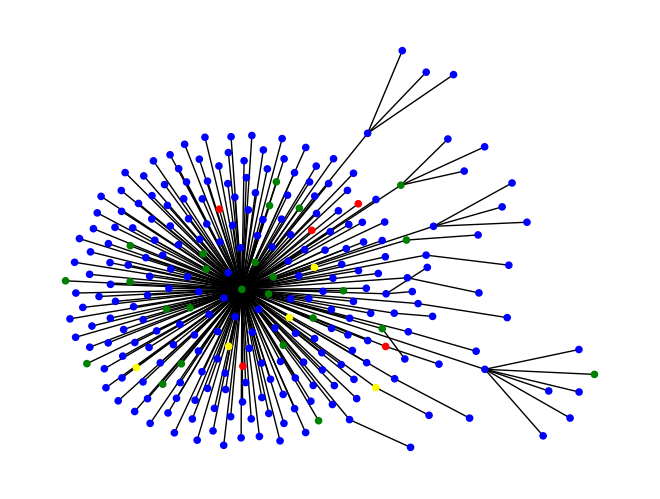

In [9]:
network.plot_subgraph_view(community_idx=124, dataset_train=dataset.df_train, dataset_test=dataset.df_test)

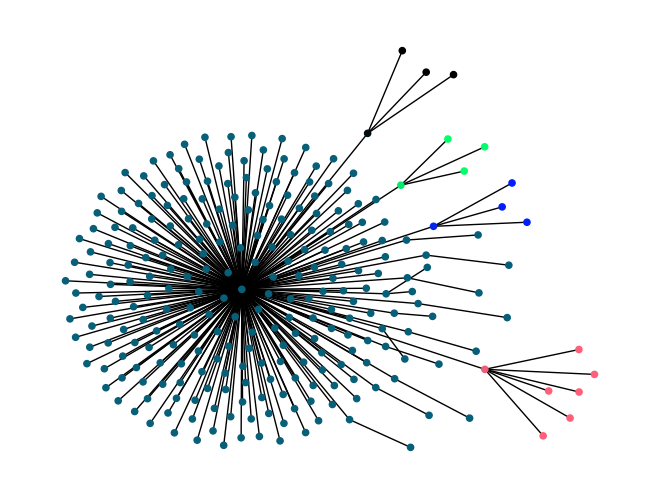

In [8]:
network.plot_subgraph_view_spectral(community_idx=124)

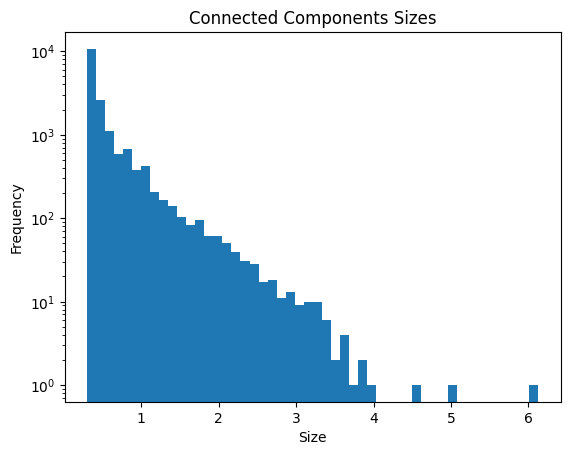

In [21]:
connected_components_sizes = [len(c) for c in network.communities]
import numpy as np
import matplotlib.pyplot as plt

plt.hist(np.log10(np.array(connected_components_sizes)), bins=50, log=True)
plt.title("Connected Components Sizes")
plt.xlabel("Size [log 10]")
plt.ylabel("Frequency")
plt.show()

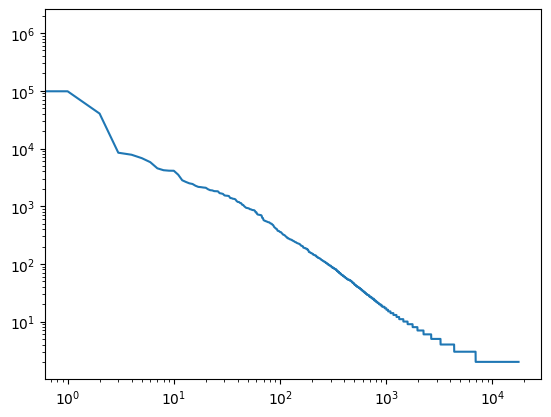

In [25]:
plt.loglog(connected_components_sizes)

Subgraph of size 355


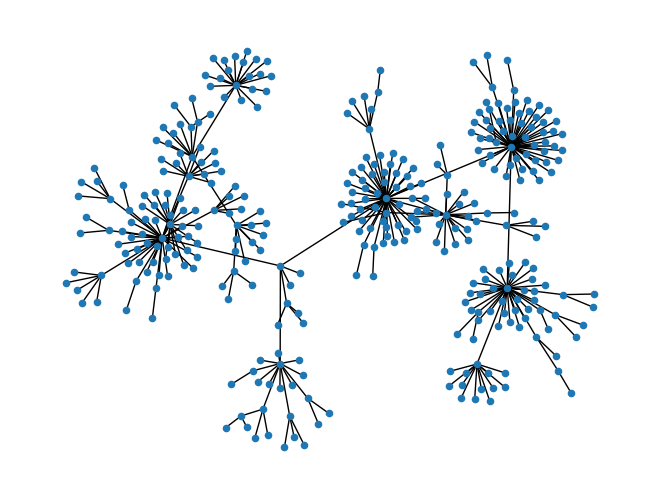

In [34]:
import networkx as nx

subgraph = nx.induced_subgraph(network.graph, network.communities[100])

A_ = nx.to_scipy_sparse_array(
    subgraph, nodelist=subgraph.nodes, dtype=int
).tocsr()

print(f"Subgraph of size {subgraph.size()}")
# nx.draw(subgraph)

import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

pos = graphviz_layout(subgraph, prog="sfdp")  # dot, neato, fdp, sfdp, twopi
nx.draw(subgraph, pos, with_labels=False, node_size=20, font_size=10)
plt.show()


In [3]:
dataset.compute_isolate_candidates_from_network(network)

There are 87878 elements in the dataset which are not present in the network.


In [5]:
nb_connected_components = nx.number_connected_components(network.graph)  #, backend="cugraph"
nb_connected_components

17624

In [5]:
from scipy.sparse import csgraph

A = nx.to_scipy_sparse_array(
    network.graph, nodelist=network.graph.nodes, dtype=float
).tocsr()
L = csgraph.laplacian(A, normed=True)

print(f"Normalized Laplacian matrix L has shape {L.shape} with {L.nnz} non-zero entries.")

Normalized Laplacian matrix L has shape (1727366, 1727366) with 5146954 non-zero entries.


In [6]:
type(L)

scipy.sparse._coo.coo_array

In [ ]:
from cupyx.scipy.sparse.csgraph import connected_components

components = connected_components(L)

In [30]:
import numpy as np

D = L - L.T
D.nnz, np.allclose(D.data, 0)

(16252, True)

In [ ]:
from scipy.sparse.linalg import eigsh

k = 2  # number of eigenvectors
vals, vecs = eigsh(L, k=k, which='LM', tol=1e-6, maxiter=10)

In [39]:
import cupyx.scipy.sparse as cusp
from cupyx.scipy.sparse.linalg import eigsh

L_gpu = cusp.csr_matrix(L)

vals, vecs = eigsh(L_gpu, k=2, which='LM', tol=1e-6, maxiter=1000)
vecs

array([[-7.51713730e-03, -1.62070089e-03],
       [ 7.17042885e-04,  1.35433152e-04],
       [ 5.76652349e-04,  4.13867316e-04],
       ...,
       [ 1.39767702e-05, -6.34658955e-04],
       [-1.24909278e-05, -5.22619029e-05],
       [ 1.37553979e-04, -2.73080792e-04]], shape=(1727366, 2))

Perfect. You already have the sparse adjacency `A`. Here's a concrete, practical path.

---

### 1. Construct the Laplacian

For an unnormalized Laplacian:

```python
from scipy.sparse import csgraph

L = csgraph.laplacian(A, normed=False)  # shape (2_000_000, 2_000_000)
```

For a normalized Laplacian:

```python
L_norm = csgraph.laplacian(A, normed=True)
```

`normed=True` is often better for embeddings.

---

### 2. Solve for the first k eigenpairs

#### CPU + SciPy (sparse, symmetric)

```python
from scipy.sparse.linalg import eigsh

k = 20  # number of eigenvectors
# 'SM' = smallest magnitude eigenvalues
vals, vecs = eigsh(L_norm, k=k, which='SM')
```

**Notes**:

* `eigsh` uses ARPACK internally.
* For large graphs, `k` should be small (<=100).
* `L_norm` must be symmetric (it is).
* Runtime ~ O(iterations * edges).

Optional speedup: precondition with LOBPCG.

```python
from scipy.sparse.linalg import lobpcg
import numpy as np

X = np.random.rand(L.shape[0], k)  # initial guess
vals, vecs = lobpcg(L_norm, X)
```

With `pyamg` you can add a multigrid preconditioner:

```python
import pyamg
ml = pyamg.ruge_stuben_solver(L_norm)
M = ml.aspreconditioner()
vals, vecs = lobpcg(L_norm, X, M=M)
```

---

### 3. GPU options

If you want CUDA:

* **cuSolver/cuSparse** via `cupy` or `cugraph`.
* Example with CuPy:

```python
import cupy as cp
import cupyx.scipy.sparse as cusparse
from cupyx.scipy.sparse.linalg import eigsh

A_gpu = cusparse.csr_matrix(A)
L_gpu = cusparse.csgraph.laplacian(A_gpu, normed=True)

vals, vecs = eigsh(L_gpu, k=20, which='SM')
```

**Notes**:

* GPU memory must hold the sparse Laplacian + Krylov basis.
* Works well for k up to a few dozen on typical GPUs.

---

### Recommendation

* **Exact CPU, moderate k**: `eigsh` or `lobpcg + pyamg`.
* **GPU speedup**: `cupyx.scipy.sparse.linalg.eigsh`.
* **Approximate, huge graphs**: Nyström or randomized methods (scikit-learn `TruncatedSVD` on normalized adjacency).

---

If you want, I can write a **ready-to-run pipeline for 2M nodes** that chooses CPU or GPU depending on memory and computes the first k eigenvectors efficiently. It will include preconditioning for LOBPCG. Do you want me to do that?


In [ ]:
result = nx.betweenness_centrality(network.graph, k=10)